<a href="https://colab.research.google.com/github/MuhammadBilal-403/Interboot/blob/main/INTERMEDIATE_LEVEL_TASK_(PART_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
df['date'] = pd.to_datetime(df['date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [ ]:

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5,6]).astype(int)


In [ ]:

df['time_index'] = (df['date'] - df['date'].min()).dt.days

In [ ]:

daily_sales = df.groupby('date')['sales'].sum().reset_index()
daily_sales['time_index'] = (daily_sales['date'] - daily_sales['date'].min()).dt.days
daily_sales['month'] = daily_sales['date'].dt.month
daily_sales['weekday'] = daily_sales['date'].dt.weekday
daily_sales['is_weekend'] = daily_sales['weekday'].isin([5,6]).astype(int)

daily_sales.head()

,date,sales,time_index,month,weekday,is_weekend
0,2013-01-01,2511.618999,0,1,1,0
1,2013-01-02,496092.417944,1,1,2,0
2,2013-01-03,361461.231124,2,1,3,0
3,2013-01-04,354459.677093,3,1,4,0
4,2013-01-05,477350.121229,4,1,5,1


In [ ]:
daily_sales.shape

(1684, 6)

In [ ]:

X_baseline = daily_sales[['time_index']]
y = daily_sales['sales']



In [ ]:

lr = LinearRegression()
lr.fit(X_baseline, y)


LinearRegression()

In [ ]:

y_pred_baseline = lr.predict(X_baseline)

In [ ]:

print("Baseline Linear Regression")
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_baseline)))
print("R2 Score:", r2_score(y, y_pred_baseline))

Baseline Linear Regression
RMSE: 163015.9969418555
R2 Score: 0.5160892756003772


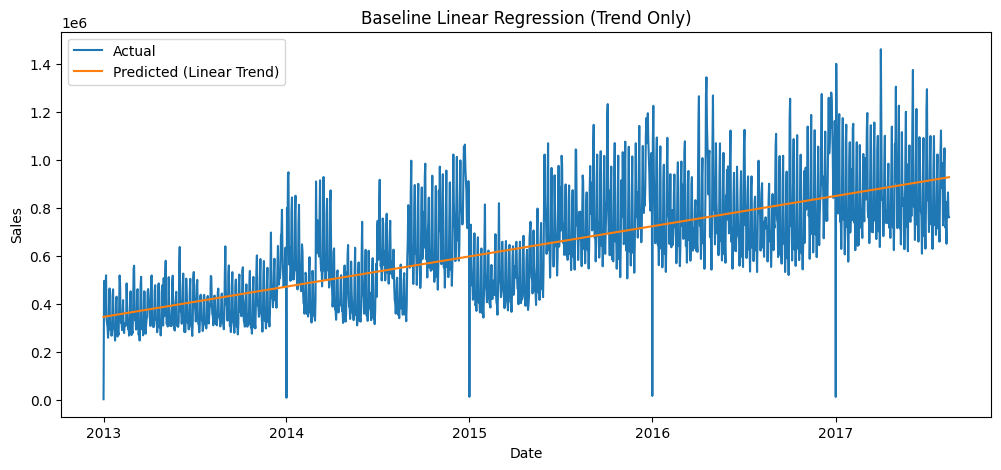

In [ ]:

plt.figure(figsize=(12,5))
plt.plot(daily_sales['date'], y, label='Actual')
plt.plot(daily_sales['date'], y_pred_baseline, label='Predicted (Linear Trend)')
plt.title("Baseline Linear Regression (Trend Only)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [ ]:

poly = PolynomialFeatures(degree=3, include_bias=False)
X_trend_poly = poly.fit_transform(daily_sales[['time_index']])




In [ ]:

X_season = pd.get_dummies(daily_sales[['month','weekday','is_weekend']], drop_first=True)

In [ ]:

X_final = np.hstack([X_trend_poly, X_season.values])


In [ ]:

reg = LinearRegression()
reg.fit(X_final, y)

LinearRegression()

In [ ]:

y_pred_final = reg.predict(X_final)

In [ ]:
print("Polynomial Regression with Seasonality")
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_final)))
print("R2 Score:", r2_score(y, y_pred_final))

Polynomial Regression with Seasonality
RMSE: 122026.33101376929
R2 Score: 0.7288485661351295


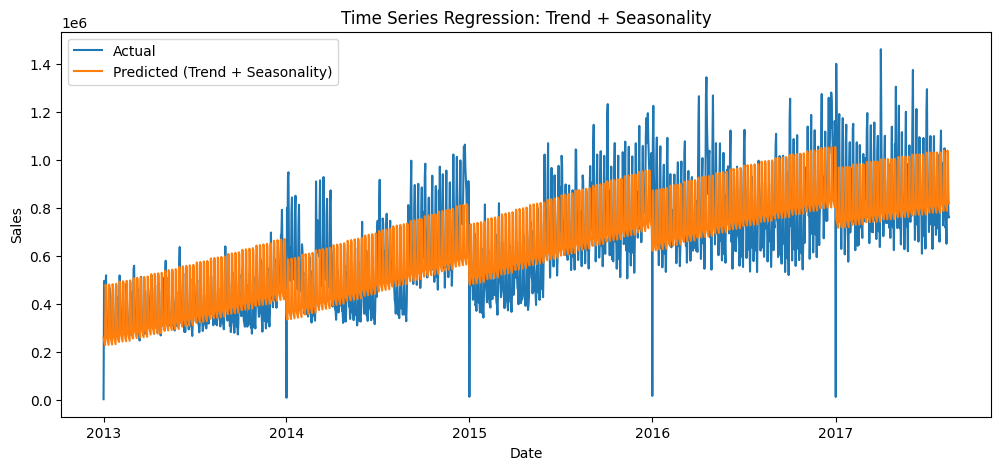

In [ ]:

plt.figure(figsize=(12,5))
plt.plot(daily_sales['date'], y, label='Actual')
plt.plot(daily_sales['date'], y_pred_final, label='Predicted (Trend + Seasonality)')
plt.title("Time Series Regression: Trend + Seasonality")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()
